<a href="https://colab.research.google.com/github/denmj/Tensorflow_learning/blob/master/TF_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy as np

In [0]:
# GEtting data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [0]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [0]:
# Construction phase

In [0]:
height = 28
width = 28 
channels = 1
n_inputs = height * width

conv1_fmaps = 32
conv1_ksize = 3
conv1_stride = 1
conv1_pad = "SAME"

conv2_fmaps = 64
conv2_ksize = 3
conv2_stride = 2
conv2_pad = "SAME"

pool3_fmaps = conv2_fmaps

n_full_conn_1 = 64
n_outputs = 10

In [0]:
reset_graph()

In [0]:
with tf.name_scope("input"):
  X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
  X_reshaped = tf.reshape(X, shape=[-1, height, width, channels])
  y = tf.placeholder(tf.int32, shape=[None], name="y")

In [0]:
conv1 = tf.layers.conv2d(X_reshaped, filters=conv1_fmaps, kernel_size=conv1_ksize,
                         strides=conv1_stride, padding=conv1_pad,
                         activation=tf.nn.relu, name="conv1")
conv2 = tf.layers.conv2d(conv1, filters=conv2_fmaps, kernel_size=conv2_ksize,
                         strides=conv2_stride, padding=conv2_pad,
                         activation=tf.nn.relu, name="conv2")

In [0]:
with tf.name_scope("max_pool"):
  pool3 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
  pool3_flat = tf.reshape(pool3, shape=[-1, pool3_fmaps * 7 * 7])
  

In [0]:
with tf.name_scope("fc1"):
    fc1 = tf.layers.dense(pool3_flat, n_full_conn_1, activation=tf.nn.relu, name="fc1")

Instructions for updating:
Use keras.layers.Dense instead.


In [0]:
with tf.name_scope("output"):
    logits = tf.layers.dense(fc1, n_outputs, name="output")
    Y_proba = tf.nn.softmax(logits, name="Y_proba")

In [0]:
with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)

In [0]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [0]:
with tf.name_scope("init_and_save"):
    saver = tf.train.Saver()
    

In [0]:
n_epochs = 10
batch_size = 100

In [0]:
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print(epoch, "Last batch accuracy:", acc_batch, "Test accuracy:", acc_test)

        save_path = saver.save(sess, "./my_mnist_model")

0 Last batch accuracy: 0.99 Test accuracy: 0.9762
1 Last batch accuracy: 0.98 Test accuracy: 0.9847
2 Last batch accuracy: 0.98 Test accuracy: 0.9789
3 Last batch accuracy: 0.99 Test accuracy: 0.9884
4 Last batch accuracy: 0.98 Test accuracy: 0.9895
5 Last batch accuracy: 1.0 Test accuracy: 0.9887
6 Last batch accuracy: 0.99 Test accuracy: 0.9887
7 Last batch accuracy: 1.0 Test accuracy: 0.9897
8 Last batch accuracy: 1.0 Test accuracy: 0.9879
9 Last batch accuracy: 1.0 Test accuracy: 0.989


In [0]:
conv2_eval.shape


(55000, 14, 14, 64)

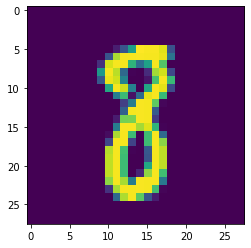

In [0]:
plt.imshow(X_train[50].reshape(28,28))

In [0]:
# plt.imshow(conv1_eval[10, :, :, 1])

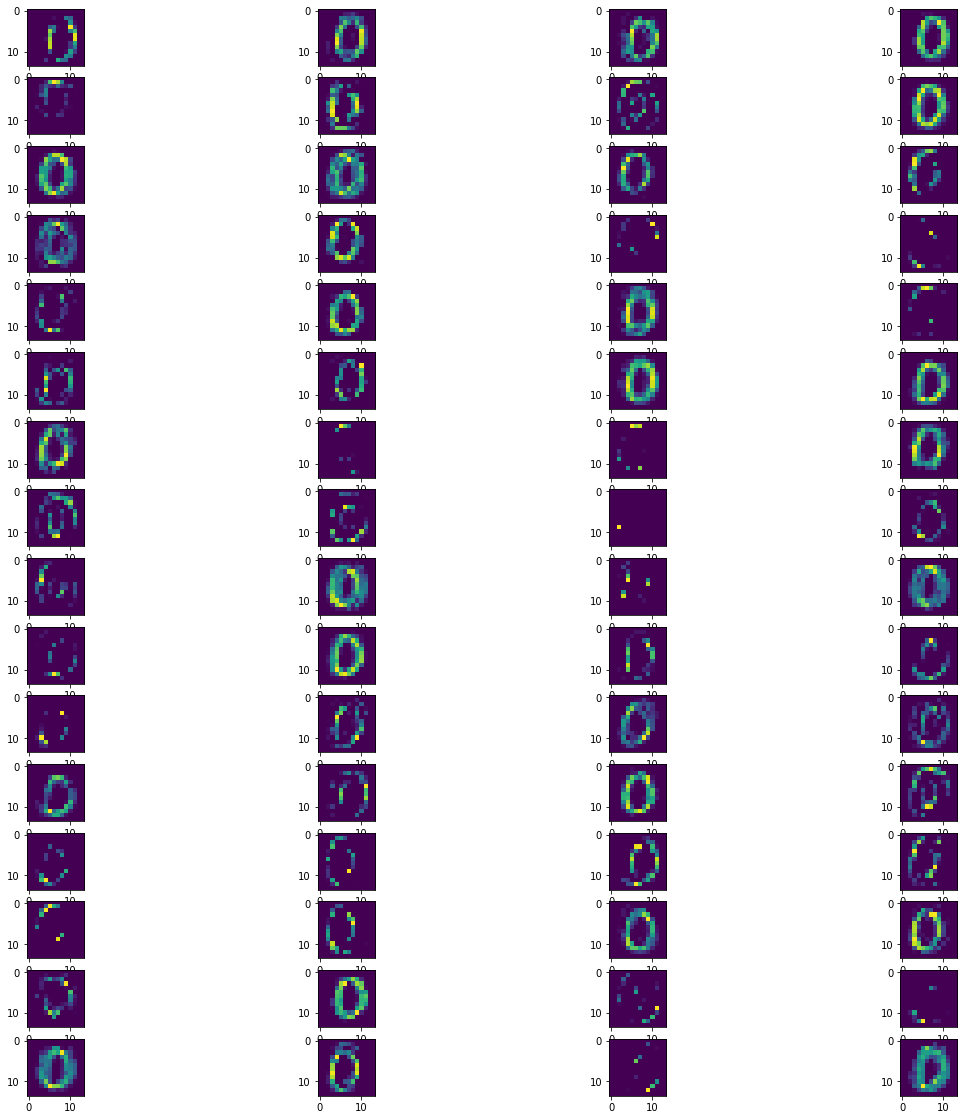

In [0]:
cols = 4
rows = 16
fig=plt.figure(figsize=(20, 20))
for f_map in range(len(conv2_eval[50,13,13,:])):
  fig.add_subplot(rows, cols, f_map+1)
  plt.imshow(conv2_eval[10, :, :, f_map])

In [0]:
# Visualize CNN
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [0]:
# tf.compat.v1.disable_eager_execution()
%tensorboard --logdir logs/temp

Reusing TensorBoard on port 6006 (pid 385), started 1:14:00 ago. (Use '!kill 385' to kill it.)